# Yahtzee in Python

## Rules of Yahtzee (simplified)

Roll five dice, and re-roll some of them until all five dice show the same number.

* __Roll five dice.__ Suppose we get 1, 2, 1, 3, 1.
* __Keep the values that occur the most.__ In our example, we have three 1s. 
* __Re-roll the other dice.__ In this case, we re-roll the two dice that were not 1s. Suppose we get 1 and 4.
* __Repeat.__ In our example, we now have 1,1,1,1,4. Re-roll the die that isn't a 1 until it shows a 1

## Question

__What is the average number of rolls until all five dice show the same number?__

Let's use a simulation to find out! Fill in the missing code below to complete the simulation in Python. For reference, you may use your simulation in Mathematica, or the [completed Mathematica simulation](https://www.mlwright.org/teaching/math242s19/files/2019-04-05_Yahtzee_complete.nb) from the course web site.

## Simulating Yahtzee

We need to simulate rolling a die. We will use the **randint** function, which is found in the **random** module.

In [0]:
import random
random.randint(1,6)

6

Now we will write a function to roll $n$ dice.

In [0]:
def rollDice(n):
  rolls = []
  for i in range(n):
    rolls.append(random.randint(1,6))
  return rolls

Note that the running the code above doesn't produce any output, it just stores our function in memory. Now we can try out our function to roll 5 dice:


In [0]:
currRolls = rollDice(5)
print(currRolls)

[1, 1, 6, 2, 6]


We need to count the number of matches. To do this, we will count the number of 1s, 2s, ..., 6s that appear in **currRolls**. We will store these counts into a new list called **matches**.


In [0]:
matches = []
#
for i in range(1,7):
  matches.append(currRolls.count(i))
#fill in the missing code here
#
print(matches)

[2, 1, 0, 0, 0, 2]


Now we need to find the largest number in our list **matches**, which we can do using the **max()** function. This tells us how many times the most common roll appears.

In [0]:
maxMatch = max(matches)# fill in the missing code here
print(maxMatch)

2


Next we need to find out which number on the dice was the most common roll. We can do this using the **index()** function. Don't forget that Python list indexes start at 0!

In [0]:
matchValue = matches.index(maxMatch)+1 # fill in the missing code here
print(matchValue)

1


**Question**: Suppose that the maximum entry in **matches** occurs twice. (For example, maybe the dice rolled two 3s and two 5s.) What number will be stored in **matchValue**?

Now we must remove all non-match dice. The easiest way to do this is to reconstruct **currRolls** to contain **maxMatch** entries, each of which is **matchValue**.

In [0]:
currRolls = [matchValue for i in range(maxMatch)] # this is a "list comprehension" in Python
print(currRolls)

[1, 1]


If all dice don't show the same number, then re-roll the other dice:

In [0]:
currRolls += rollDice(5-len(currRolls))
# fill in the missing code here
print(currRolls)

[1, 1, 4, 2, 6]


At this point, we want to again count the number of matches. We could re-run the line of code above that does that. However, a more elegant solution is to write a loop that rolls the dice, counts mathces, and re-rolls as many times as necessary until all five dice show the same number. We will put this loop in a function, so we can run it easily. The function will return the number of rolls.

In [0]:
def rollYahtzee():
  # define some variables that we will need
  numRolls = 0
  currRolls = []
  
  # roll until all five dice show the same value
  while(len(currRolls) < 5):
    # roll the dice
    numRolls += 1
    currRolls += rollDice(5-len(currRolls))
    
    #print(currRolls) # for testing only
    matches=[]
    for i in range(1,7):
      matches.append(currRolls.count(i))
    # count the number of matches
    
    maxMatch = max(matches)
    
    # find the number of times the most common roll appears
    
    matchValue = matches.index(maxMatch)+1
    
    # find the number shown on the most common roll
    
    currRolls=[matchValue for i in range(maxMatch)]
    
    # remove all non-matched dice
    
    
  # now all five dice show the same value, so return numRolls
  return numRolls

Try it out:

In [0]:
rollYahtzee()

6

## Average number of rolls

Simulate Yahtzee many times and record how many rolls each simulation takes. (Comment out the `print` statement in `RollYahtzee` before doing this.) Then compute the average number of rolls.

*Note*: To compute the average, you could use the built-in functions `sum` and `len`. Or, you could use the `mean` function in the [NumPy](http://www.numpy.org/) module.

In [0]:

def calcAve(n):
  tot=0
  for i in range(1,n+1):
    tot += rollYahtzee()
  ave=tot/(n+1)


## A Quick Tutorial on Plotting with Python

The module `matplotlib.pyplot` contains many functions that allow you to easily make plots with Python. Here, we will learn how to make histograms and plot lists of points.

First, run the following line of code, which imports the matplotlib.pyplot module and lets you refer to it simply as plt:

In [0]:
import matplotlib.pyplot as plt

### Histograms

To make a histogram, we simply call `plt.hist()`, sending the function a list of data. We can also specify various parameters, such as the number of bins. Here are some examples:

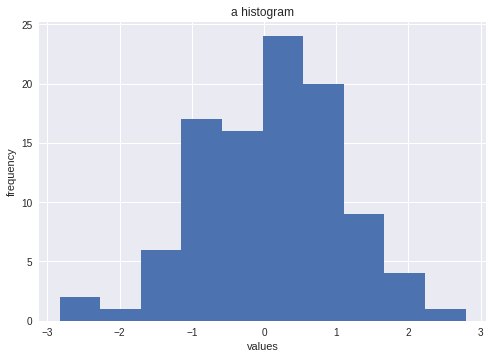

In [0]:
# generate a list of random numbers
import random
values = [random.normalvariate(0,1) for _ in range(100)]

# now make a histogram of the values
plt.hist(values, bins=10)

# add a title and such
plt.title("a histogram")
plt.xlabel("values")
plt.ylabel("frequency");

For more information about plotting histograms, see [this tutorial](https://pythonspot.com/matplotlib-histogram/) or the [official matplotlib.pyplot.hist documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

### Plotting a list of points

To plot points, we simply call `plt.plot()`, sending the function a list of $x$-values and a list of $y$-values. We can also specify various parameters that determine how the plot looks. Here are some examples:

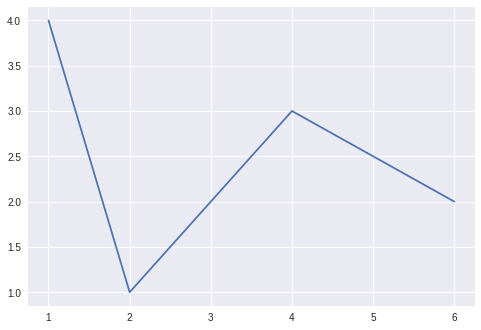

In [0]:
xvals = [1,2,4,6]
yvals = [4,1,3,2]

# by default, the points will be connected with line segments in the plot
plt.plot(xvals,yvals);

[4, 7, 8, 8, 5, 3, 7, 5, 6, 4]


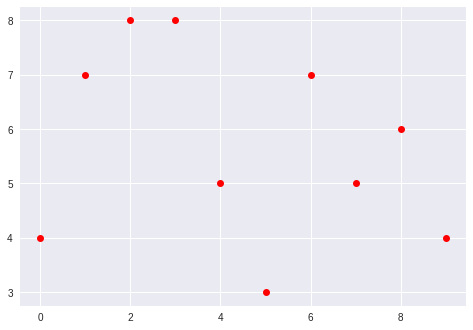

In [0]:
xvals = range(10)
yvals = [random.randint(1,10) for _ in range(10)]
print(yvals)

# Add a formatting paramater to change the plot style. For example, 'ro' means red dots.
plt.plot(xvals, yvals, 'ro');

For more information about plotting points, see [this tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) or the [official matplotlib.pyplot.plot documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

## Questions to Investigate

### 1. What are the relative fequencies of the different numbers of rolls until all dice show the same number?

Make a histogram of the number of rolls before all dice show the same number.

### 2. How often does each number 1, 2, 3, 4, 5, 6 appear as the most common number?

It is probably 1/6? Maybe not, because sometimes there are two pairs of matched die, and the simulation chooses one of these to keep and the other to re-roll. Make a histogram of how often each number appears as the matched value.

### 3. What happens if you change the game to use $n$ dice instead of 5?

Make a plot showing the average number of rolls as a function of $n$.

### 4. What happens if you change the game to use $k$-sided dice instead of 6-sided dice?

Make a plot showing the average number of rolls as a function of $k$.